# The contour scatter plot verifies the DICOM is LPS+
    I have only verified the axis direction for now, not the order yet!
        Left is larger
        Posterior is larger
        Superior is larger
    But as for order, it seems that the current coding structure is fine!
        x+ is R->L (note tumor is on patient right/image left on this case)
        y+ is A->P
        z+ is I->S


    
    

In [1]:
# import sys
# from pathlib import Path
# # Add the third_party dicomviewer to the path
# PROJECT_ROOT = Path(__file__).resolve().parent.parent
# sys.path.insert(0, str(PROJECT_ROOT / "third_party" / "dicomviewer" / "src"))

# try:
#     from dicom_viewer.readers.DICOMImageReader import DICOMImageReader
#     from dicom_viewer.readers.RTDoseReader import RTDoseReader
#     from dicom_viewer.readers.RTStructReader import RTStructReader
# except ImportError as e:
#     print(f"Warning: Could not import DICOM readers: {e}")
#     print("Continuing with basic pydicom functionality only.")

In [2]:
# Import necessary modules from dicomviewer
import sys
sys.path.append('/homebase/DL_projects/code_sync/myMedIADIRLab/third_party/dicomviewer/src')

from dicom_viewer.readers.RTStructReader import RTStructReader
from dicom_viewer.readers.DICOMImageReader import DICOMImageReader
import os


In [3]:
# Define the path to the RT struct file
rt_struct_path = "/database/brainmets/dicom/Data/SRS0871/1999-04__Studies_new/SRS0871_SRS0871_RTst_1999-04-02_000000_._Brain.MS.ReTx.Model_n1__00000"

# Check if the path exists
if os.path.exists(rt_struct_path):
    print(f"RT struct path exists: {rt_struct_path}")
    
    # Initialize and load the RT struct reader
    rt_reader = RTStructReader(rt_struct_path)
    rt_reader.read()
    
    print("RT struct file loaded successfully!")
else:
    print(f"Path does not exist: {rt_struct_path}")


RT struct path exists: /database/brainmets/dicom/Data/SRS0871/1999-04__Studies_new/SRS0871_SRS0871_RTst_1999-04-02_000000_._Brain.MS.ReTx.Model_n1__00000
RT struct file loaded successfully!


In [4]:
# Display available structure names
if 'rt_reader' in locals():
    try:
        structure_names = rt_reader.get_structure_names()
        print(f"Found {len(structure_names)} structures:")
        for i, name in enumerate(structure_names):
            print(f"{i+1}. {name}")
            
        # Display structure colors if available
        print("\nStructure colors:")
        for name in structure_names:
            try:
                color = rt_reader.get_structure_color(name)
                print(f"  {name}: RGB{color}")
            except Exception as e:
                print(f"  {name}: Color not available ({e})")
                
    except Exception as e:
        print(f"Error getting structure names: {e}")
else:
    print("RT reader not initialized. Please run the previous cell first.")


Found 5 structures:
1. target1
2. *Skull
3. 12.00 Gy (35.60% of dose)
4. Brain_target1
5. Brain-target1

Structure colors:
  target1: RGB[255, 0, 0]
  *Skull: RGB[0, 0, 255]
  12.00 Gy (35.60% of dose): RGB[255, 20, 147]
  Brain_target1: RGB[0, 235, 235]
  Brain-target1: RGB[255, 255, 0]


In [5]:
# Example: Access structure data
if 'rt_reader' in locals() and 'structure_names' in locals():
    if len(structure_names) > 0:
        # Get the first structure as an example
        first_structure = structure_names[0]
        print(f"Example: Working with structure '{first_structure}'")
        
        try:
            # Get structure index
            structure_index = rt_reader.get_structure_index(first_structure)
            print(f"Structure index: {structure_index}")
            
            # Get structure color
            color = rt_reader.get_structure_color(first_structure)
            print(f"Structure color: RGB{color}")
            
            # Access the raw RT struct data
            print(f"\nRT struct dataset info:")
            print(f"  Patient ID: {rt_reader.rtstruct.PatientID}")
            print(f"  Study Date: {rt_reader.rtstruct.StudyDate}")
            print(f"  Modality: {rt_reader.rtstruct.Modality}")
            print(f"  Number of ROI contours: {len(rt_reader.roi_contours)}")
            
            # Show contour sequence info for the first structure
            contour_data = rt_reader.roi_contours[structure_index]
            print(f"\nContour data for '{first_structure}':")
            print(f"  Number of contours: {len(contour_data.ContourSequence)}")
            
            # Show first contour info
            if len(contour_data.ContourSequence) > 0:
                first_contour = contour_data.ContourSequence[0]
                print(f"  First contour points: {len(first_contour.ContourData) // 3} points")
                print(f"  Contour geometric type: {first_contour.ContourGeometricType}")
                
        except Exception as e:
            print(f"Error accessing structure data: {e}")
    else:
        print("No structures found in the RT struct file.")
else:
    print("Please run the previous cells first to load the RT struct data.")


Example: Working with structure 'target1'
Structure index: 0
Structure color: RGB[255, 0, 0]

RT struct dataset info:
  Patient ID: SRS0871
  Study Date: 19990402
  Modality: RTSTRUCT
  Number of ROI contours: 5

Contour data for 'target1':
  Number of contours: 9
  First contour points: 26 points
  Contour geometric type: CLOSED_PLANAR


Plotting all 9 contours for 'target1'
Contour 1: 26 points
Contour 2: 58 points
Contour 3: 93 points
Contour 4: 83 points
Contour 5: 53 points
Contour 6: 88 points
Contour 7: 35 points
Contour 8: 74 points
Contour 9: 43 points


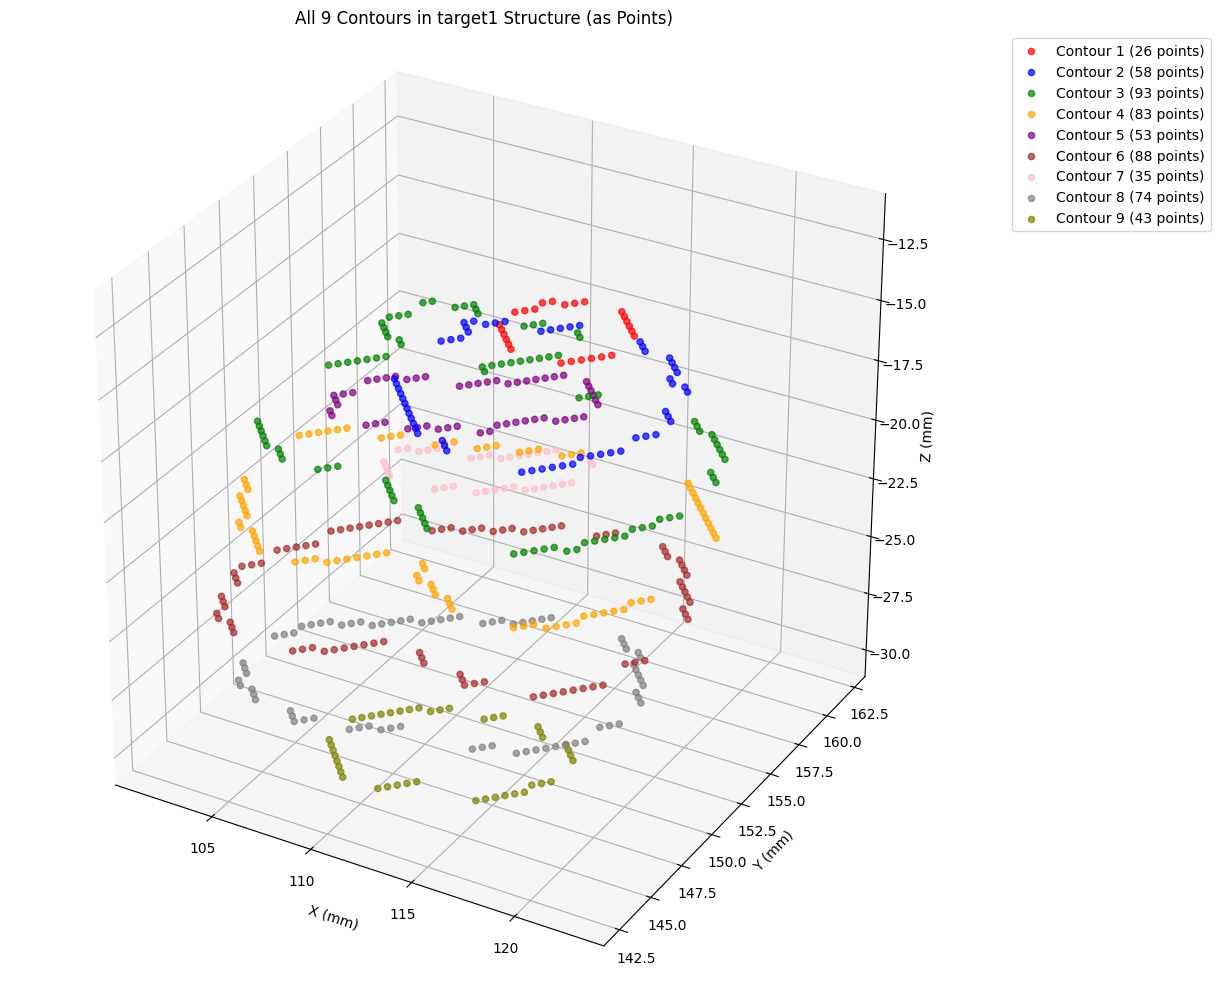


Summary:
Total contours: 9
Total points: 553


In [6]:
%matplotlib inline
# Plot all 9 contours in target1 structure as points
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

if 'rt_reader' in locals():
    structure_name = 'target1'
    try:
        # Get structure index
        structure_index = rt_reader.get_structure_index(structure_name)
        contour_data = rt_reader.roi_contours[structure_index]
        
        print(f"Plotting all {len(contour_data.ContourSequence)} contours for '{structure_name}'")
        
        # Create 3D plot
        fig = plt.figure(figsize=(12, 10))
        ax = fig.add_subplot(111, projection='3d')
        
        # Define colors for different contours
        colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive']
        
        # Plot each contour
        for i, contour in enumerate(contour_data.ContourSequence):
            # Extract x, y, z coordinates
            contour_points = np.array(contour.ContourData).reshape(-1, 3)
            x_coords = contour_points[:, 0]
            y_coords = contour_points[:, 1]
            z_coords = contour_points[:, 2]
            
            # Plot points for this contour
            color = colors[i % len(colors)]
            ax.scatter(x_coords, y_coords, z_coords, 
                      c=color, s=20, alpha=0.7, 
                      label=f'Contour {i+1} ({len(contour_points)} points)')
            
            print(f"Contour {i+1}: {len(contour_points)} points")
        
        # Set labels and title
        ax.set_xlabel('X (mm)')
        ax.set_ylabel('Y (mm)')
        ax.set_zlabel('Z (mm)')
        ax.set_title(f'All 9 Contours in {structure_name} Structure (as Points)')
        
        # Add legend
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        
        # Set equal aspect ratio
        ax.set_box_aspect([1,1,1])
        
        plt.tight_layout()
        plt.show()
        
        # Print summary
        total_points = sum(len(np.array(contour.ContourData).reshape(-1, 3)) 
                          for contour in contour_data.ContourSequence)
        print(f"\nSummary:")
        print(f"Total contours: {len(contour_data.ContourSequence)}")
        print(f"Total points: {total_points}")
        
    except Exception as e:
        print(f"Error plotting contours: {e}")
else:
    print("RT reader not initialized. Please run the previous cells first.")


Creating separate 2D plots for all 9 contours


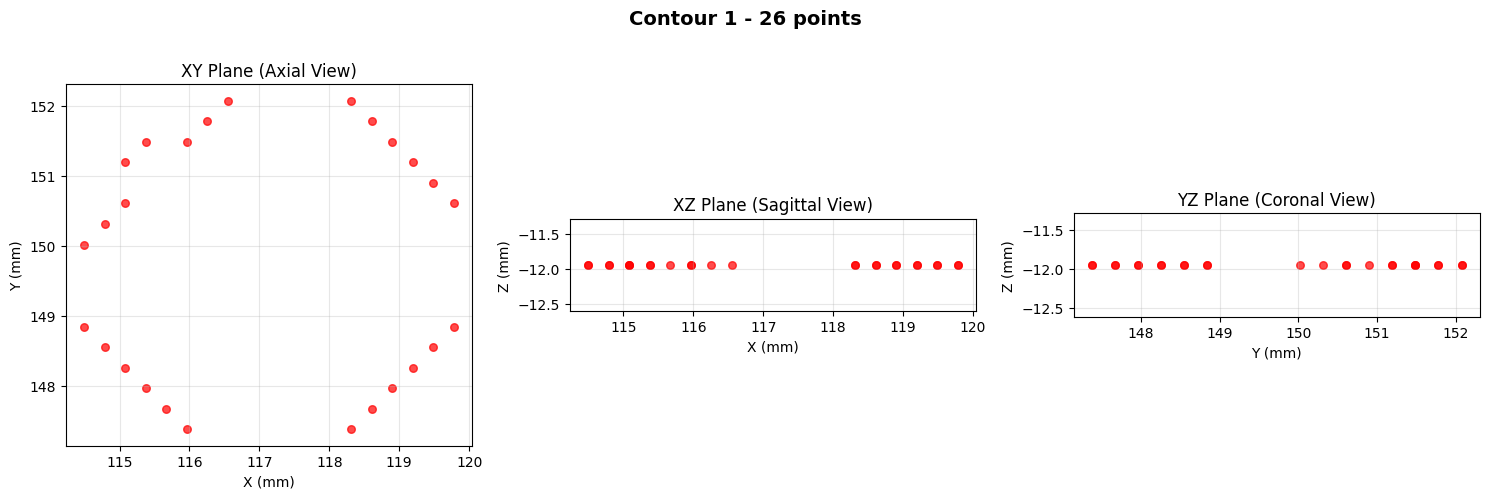

Contour 1: 26 points
  X range: 114.50 to 119.78 mm
  Y range: 147.38 to 152.07 mm
  Z range: -11.95 to -11.95 mm



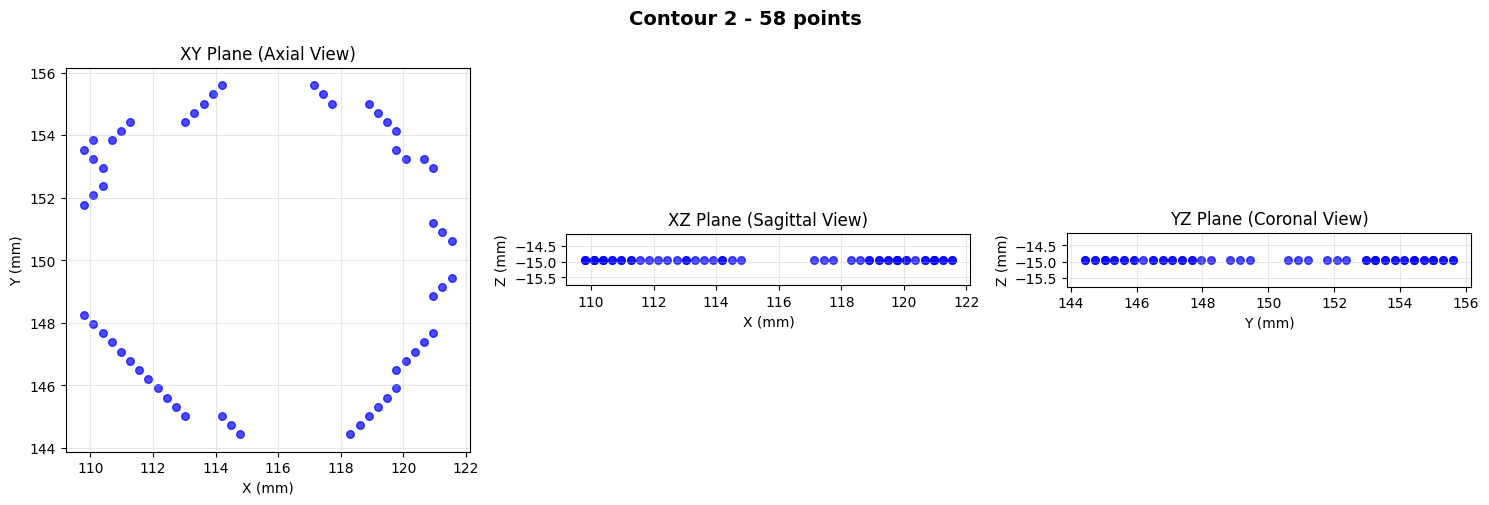

Contour 2: 58 points
  X range: 109.80 to 121.54 mm
  Y range: 144.44 to 155.60 mm
  Z range: -14.94 to -14.94 mm



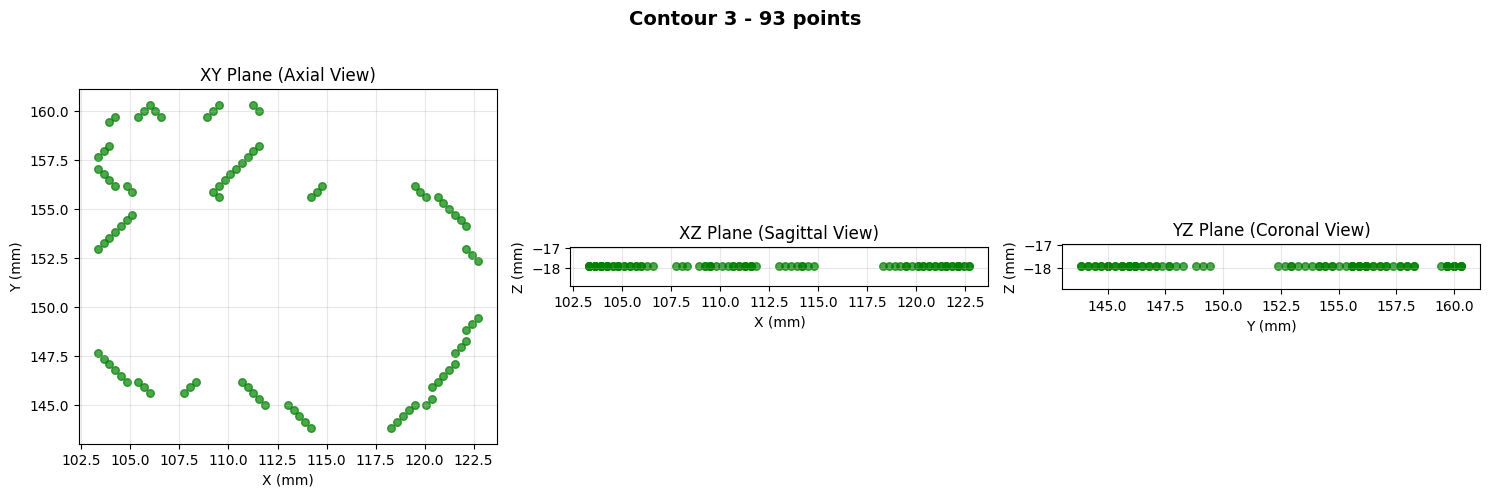

Contour 3: 93 points
  X range: 103.34 to 122.72 mm
  Y range: 143.85 to 160.29 mm
  Z range: -17.93 to -17.93 mm



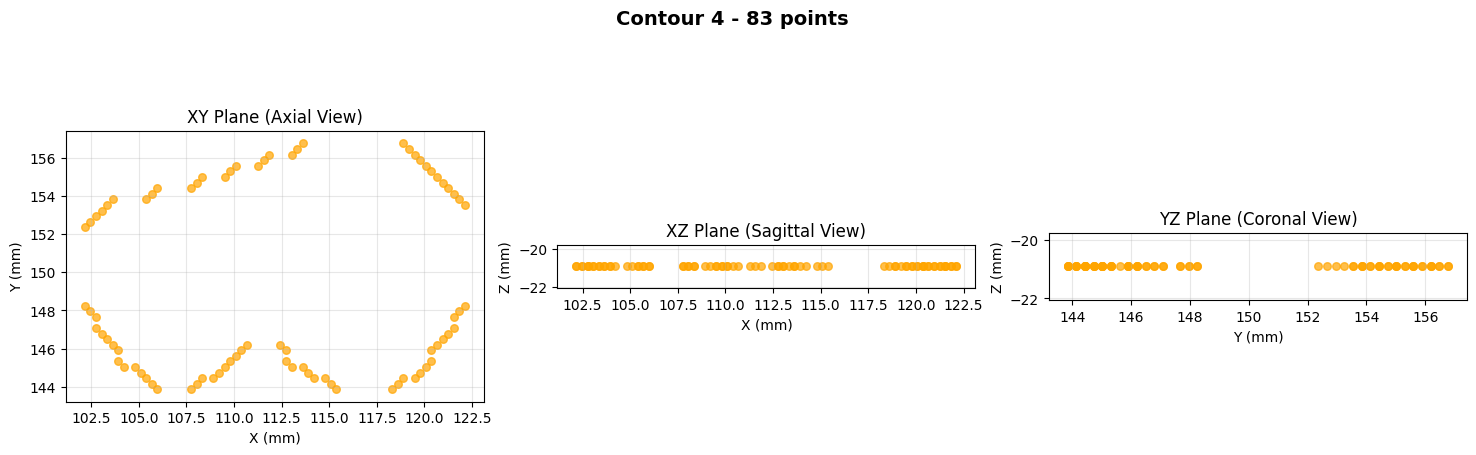

Contour 4: 83 points
  X range: 102.17 to 122.13 mm
  Y range: 143.85 to 156.77 mm
  Z range: -20.91 to -20.91 mm



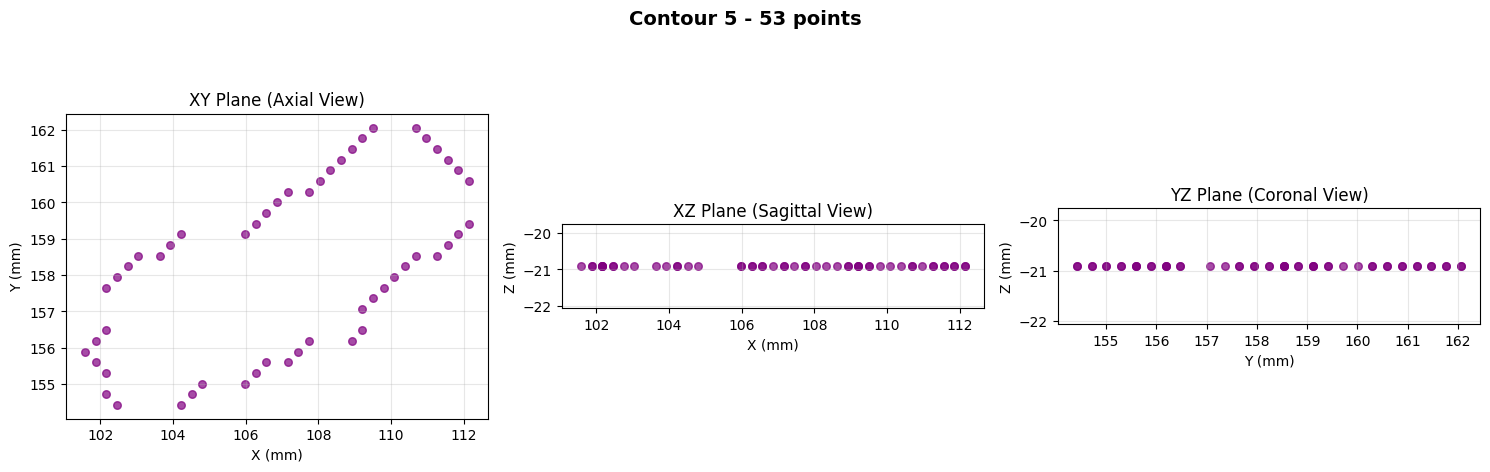

Contour 5: 53 points
  X range: 101.58 to 112.15 mm
  Y range: 154.42 to 162.06 mm
  Z range: -20.91 to -20.91 mm



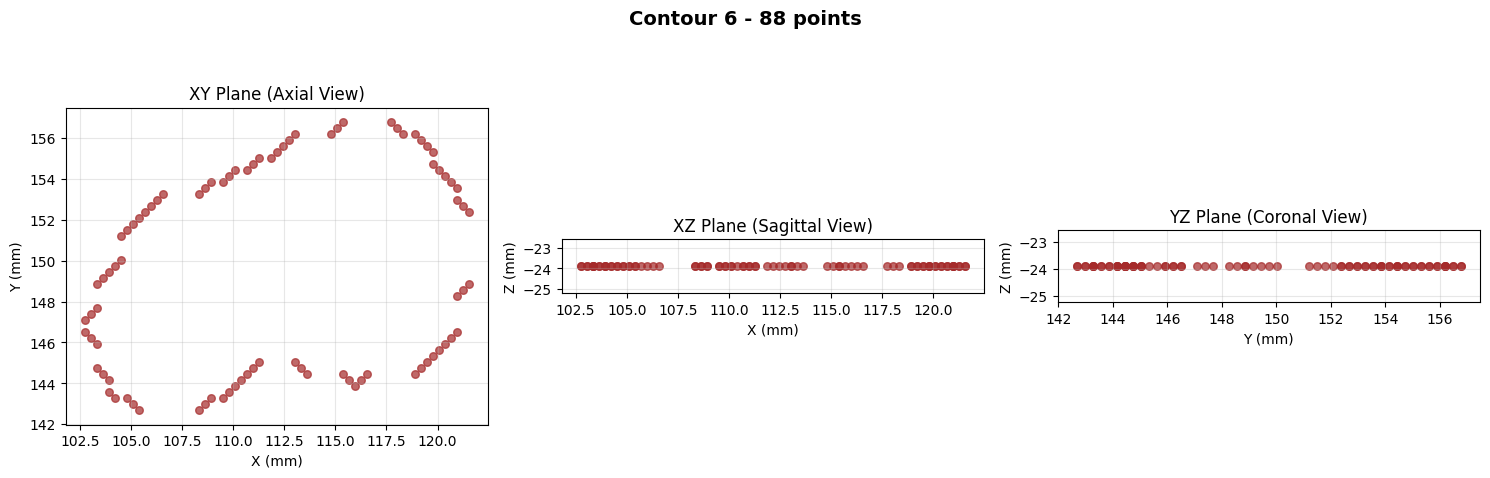

Contour 6: 88 points
  X range: 102.75 to 121.54 mm
  Y range: 142.68 to 156.77 mm
  Z range: -23.90 to -23.90 mm



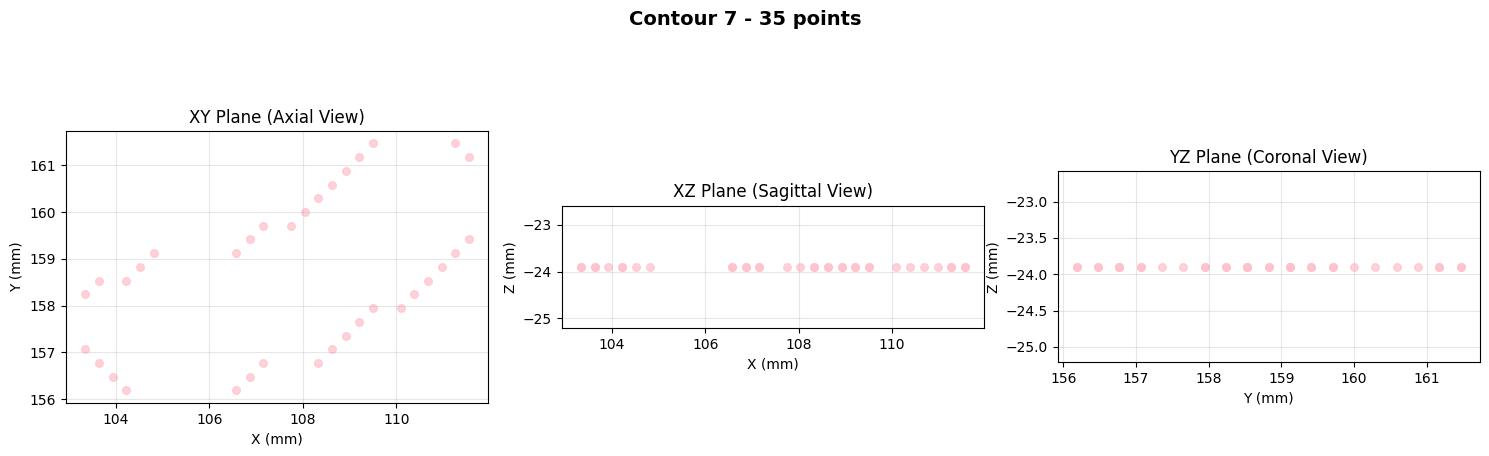

Contour 7: 35 points
  X range: 103.34 to 111.56 mm
  Y range: 156.18 to 161.47 mm
  Z range: -23.90 to -23.90 mm



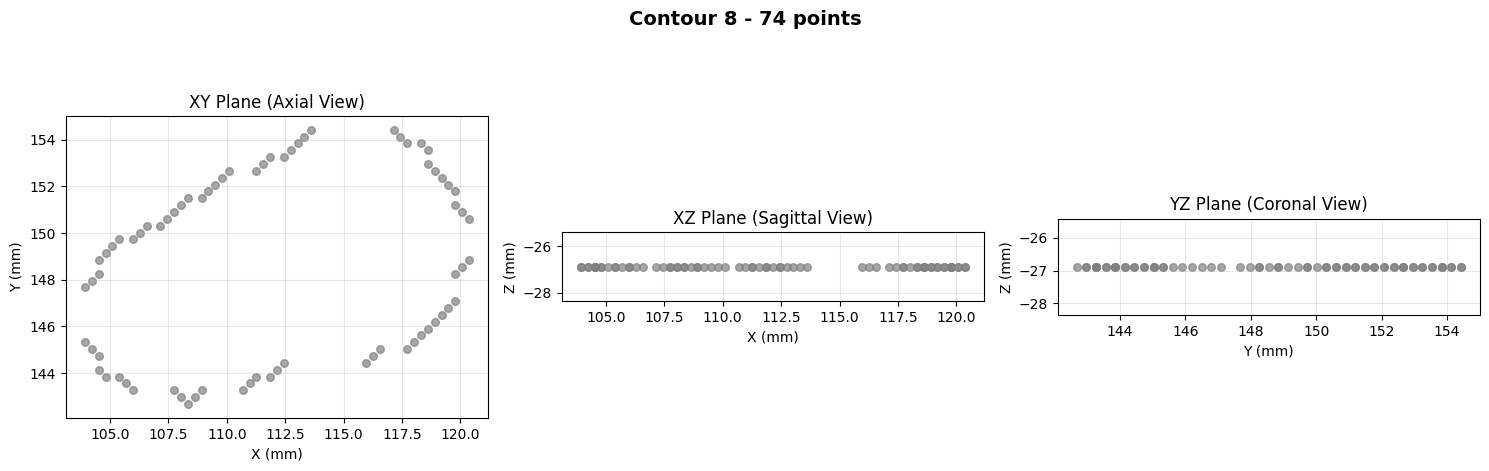

Contour 8: 74 points
  X range: 103.93 to 120.37 mm
  Y range: 142.68 to 154.42 mm
  Z range: -26.89 to -26.89 mm



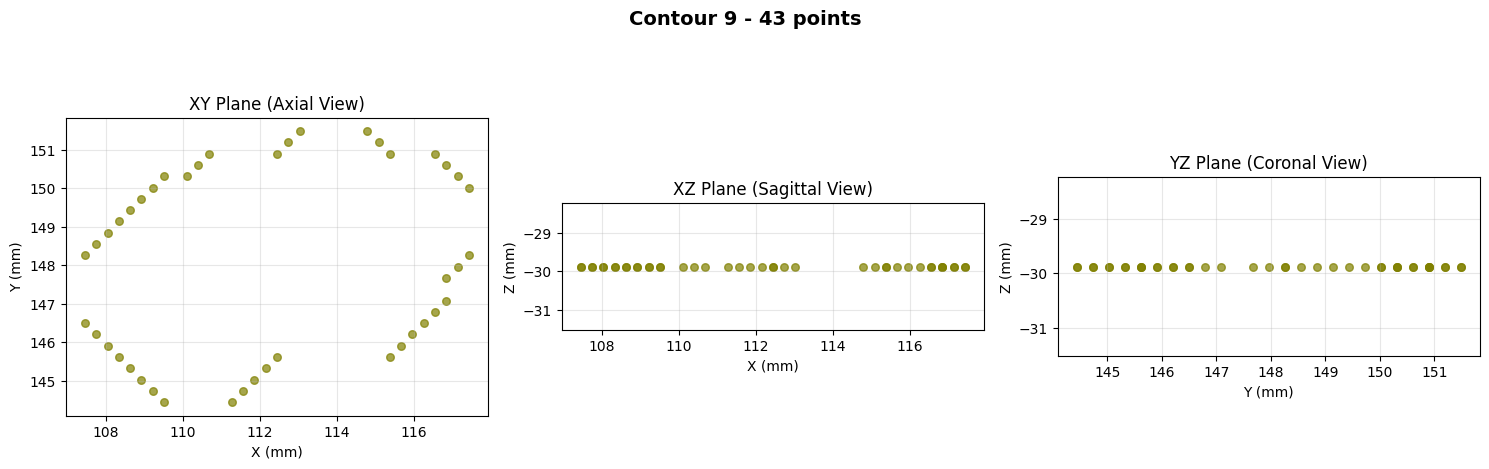

Contour 9: 43 points
  X range: 107.45 to 117.43 mm
  Y range: 144.44 to 151.49 mm
  Z range: -29.88 to -29.88 mm

Summary:
Total contours plotted: 9
Total points across all contours: 553


In [7]:
# Plot each of the 9 contours separately in individual 2D figures
import matplotlib.pyplot as plt
import numpy as np

if 'rt_reader' in locals():
    structure_name = 'target1'
    try:
        # Get structure index
        structure_index = rt_reader.get_structure_index(structure_name)
        contour_data = rt_reader.roi_contours[structure_index]
        
        print(f"Creating separate 2D plots for all {len(contour_data.ContourSequence)} contours")
        
        # Define colors for different contours
        colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive']
        
        # Create separate figures for each contour
        for i, contour in enumerate(contour_data.ContourSequence):
            # Extract x, y, z coordinates
            contour_points = np.array(contour.ContourData).reshape(-1, 3)
            x_coords = contour_points[:, 0]
            y_coords = contour_points[:, 1]
            z_coords = contour_points[:, 2]
            
            # Create a new figure for this contour
            fig, axes = plt.subplots(1, 3, figsize=(15, 5))
            fig.suptitle(f'Contour {i+1} - {len(contour_points)} points', fontsize=14, fontweight='bold')
            
            color = colors[i % len(colors)]
            
            # XY plane (axial view)
            axes[0].scatter(x_coords, y_coords, c=color, s=30, alpha=0.7)
            axes[0].set_xlabel('X (mm)')
            axes[0].set_ylabel('Y (mm)')
            axes[0].set_title('XY Plane (Axial View)')
            axes[0].grid(True, alpha=0.3)
            axes[0].set_aspect('equal')
            
            # XZ plane (sagittal view)
            axes[1].scatter(x_coords, z_coords, c=color, s=30, alpha=0.7)
            axes[1].set_xlabel('X (mm)')
            axes[1].set_ylabel('Z (mm)')
            axes[1].set_title('XZ Plane (Sagittal View)')
            axes[1].grid(True, alpha=0.3)
            axes[1].set_aspect('equal')
            
            # YZ plane (coronal view)
            axes[2].scatter(y_coords, z_coords, c=color, s=30, alpha=0.7)
            axes[2].set_xlabel('Y (mm)')
            axes[2].set_ylabel('Z (mm)')
            axes[2].set_title('YZ Plane (Coronal View)')
            axes[2].grid(True, alpha=0.3)
            axes[2].set_aspect('equal')
            
            plt.tight_layout()
            plt.show()
            
            # Print contour info
            print(f"Contour {i+1}: {len(contour_points)} points")
            print(f"  X range: {x_coords.min():.2f} to {x_coords.max():.2f} mm")
            print(f"  Y range: {y_coords.min():.2f} to {y_coords.max():.2f} mm")
            print(f"  Z range: {z_coords.min():.2f} to {z_coords.max():.2f} mm")
            print()
        
        # Print overall summary
        total_points = sum(len(np.array(contour.ContourData).reshape(-1, 3)) 
                          for contour in contour_data.ContourSequence)
        print(f"Summary:")
        print(f"Total contours plotted: {len(contour_data.ContourSequence)}")
        print(f"Total points across all contours: {total_points}")
        
    except Exception as e:
        print(f"Error plotting contours: {e}")
else:
    print("RT reader not initialized. Please run the previous cells first.")


Analyzing z-values for all 9 contours in 'target1'
Contour 1: z = -11.95 mm, 26 points
Contour 2: z = -14.94 mm, 58 points
Contour 3: z = -17.93 mm, 93 points
Contour 4: z = -20.91 mm, 83 points
Contour 5: z = -20.91 mm, 53 points
Contour 6: z = -23.90 mm, 88 points
Contour 7: z = -23.90 mm, 35 points
Contour 8: z = -26.89 mm, 74 points
Contour 9: z = -29.88 mm, 43 points

Found 7 unique z-values:
  z = -29.88 mm: 1 contour(s)
  z = -26.89 mm: 1 contour(s)
  z = -23.90 mm: 2 contour(s)
  z = -20.91 mm: 2 contour(s)
  z = -17.93 mm: 1 contour(s)
  z = -14.94 mm: 1 contour(s)
  z = -11.95 mm: 1 contour(s)

Creating plot for z = -29.88 mm (1 contour(s))


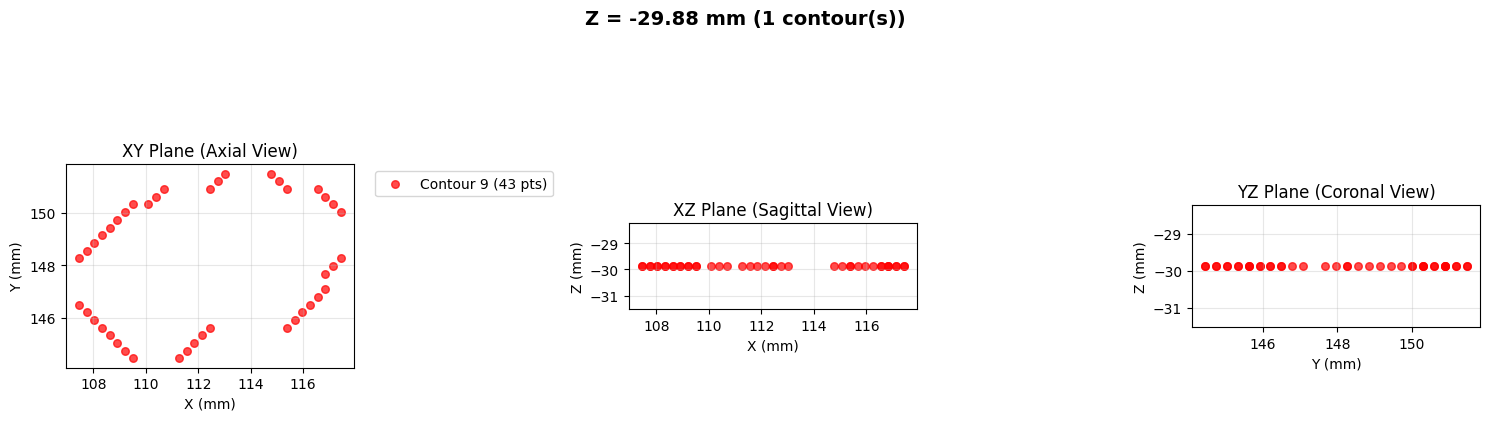

  Total points at z = -29.88 mm: 43

Creating plot for z = -26.89 mm (1 contour(s))


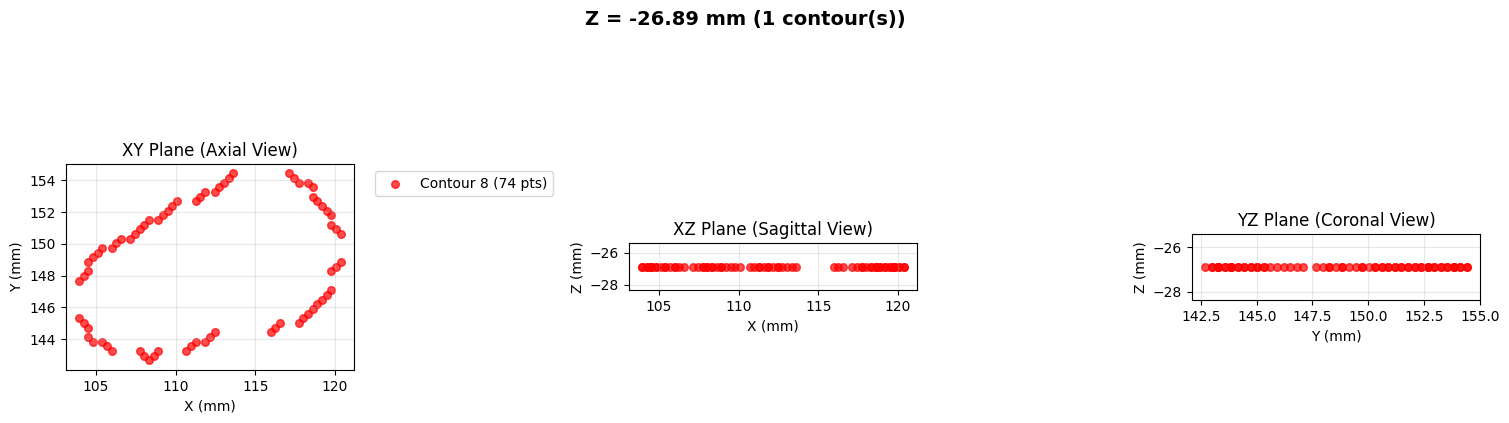

  Total points at z = -26.89 mm: 74

Creating plot for z = -23.90 mm (2 contour(s))


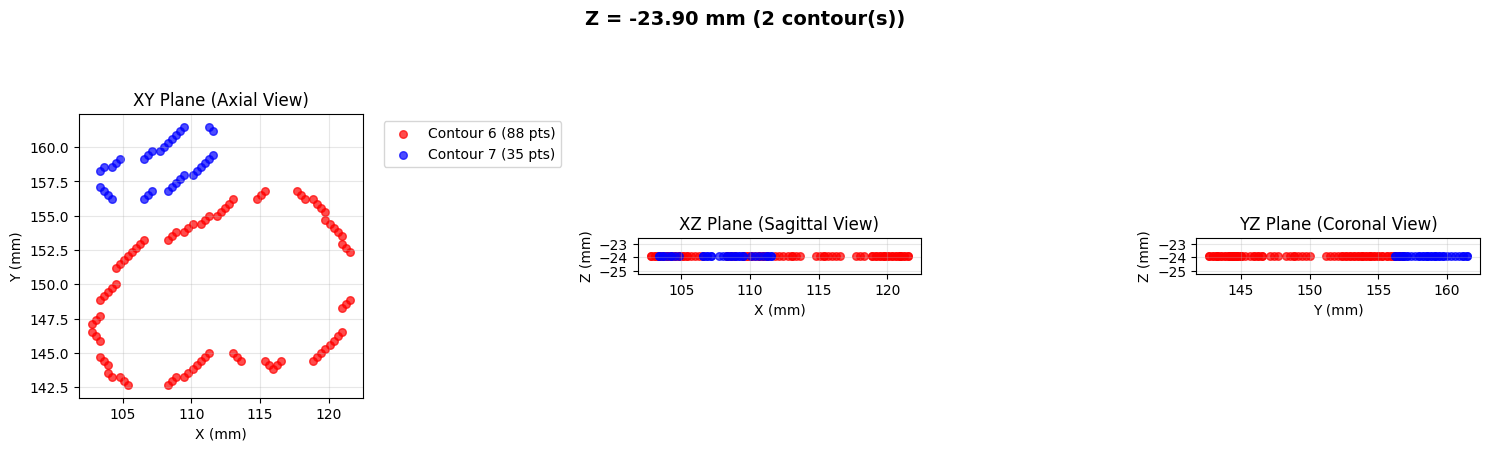

  Total points at z = -23.90 mm: 123

Creating plot for z = -20.91 mm (2 contour(s))


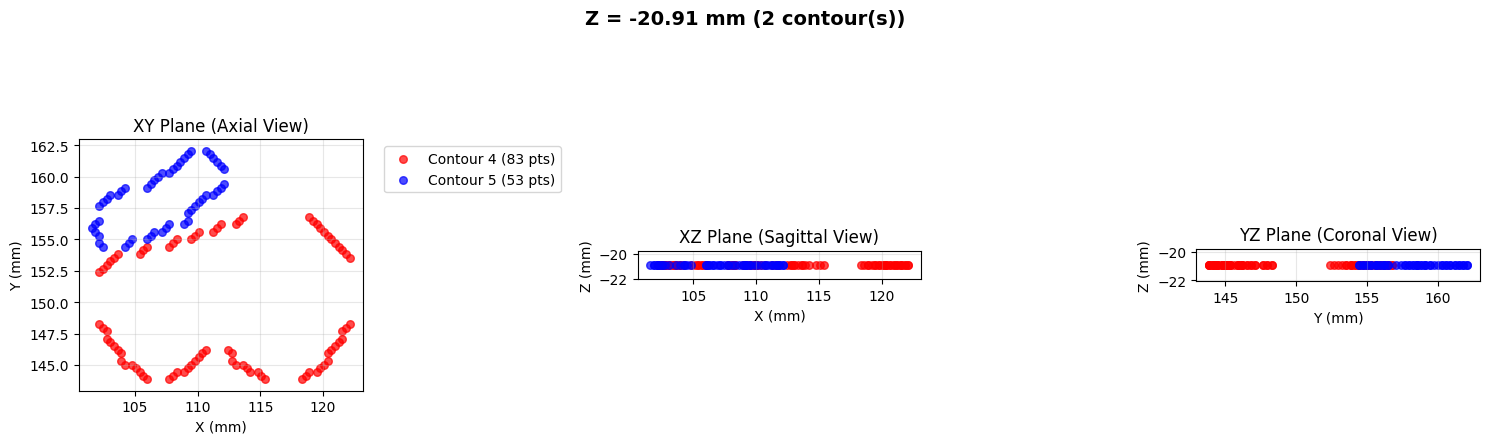

  Total points at z = -20.91 mm: 136

Creating plot for z = -17.93 mm (1 contour(s))


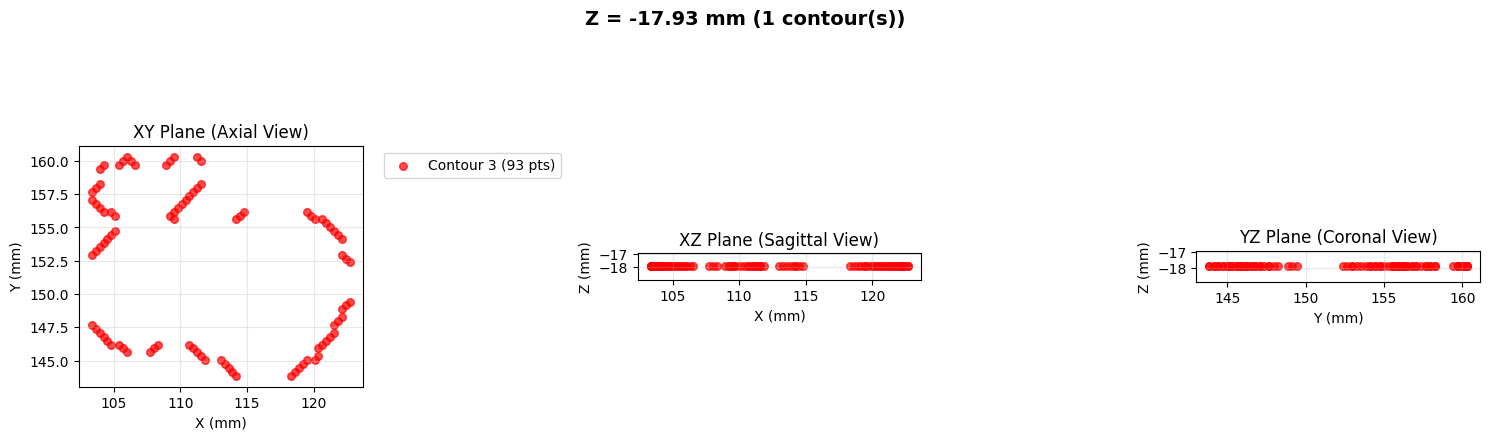

  Total points at z = -17.93 mm: 93

Creating plot for z = -14.94 mm (1 contour(s))


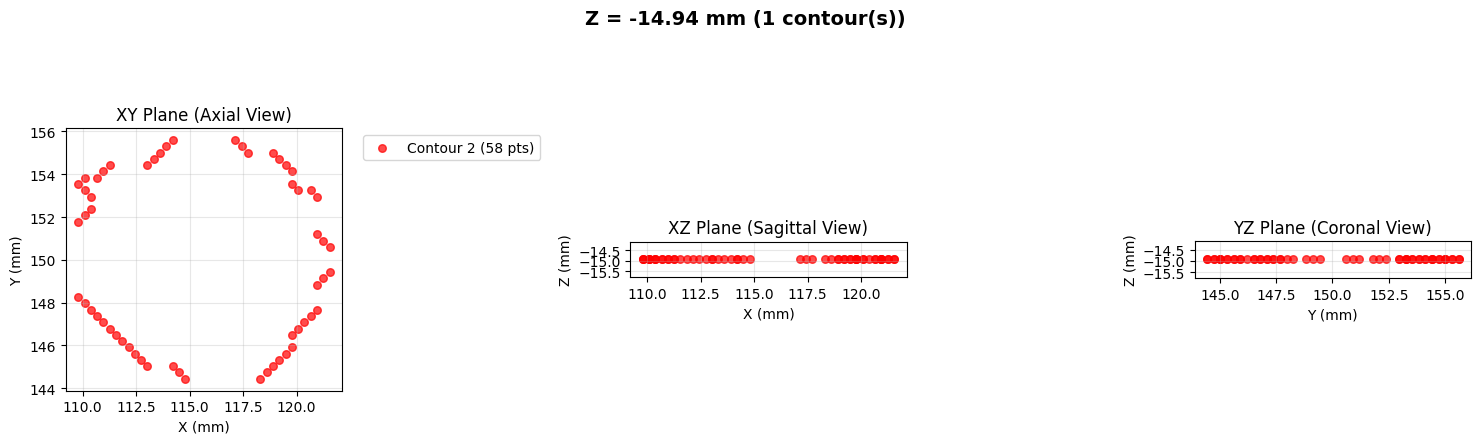

  Total points at z = -14.94 mm: 58

Creating plot for z = -11.95 mm (1 contour(s))


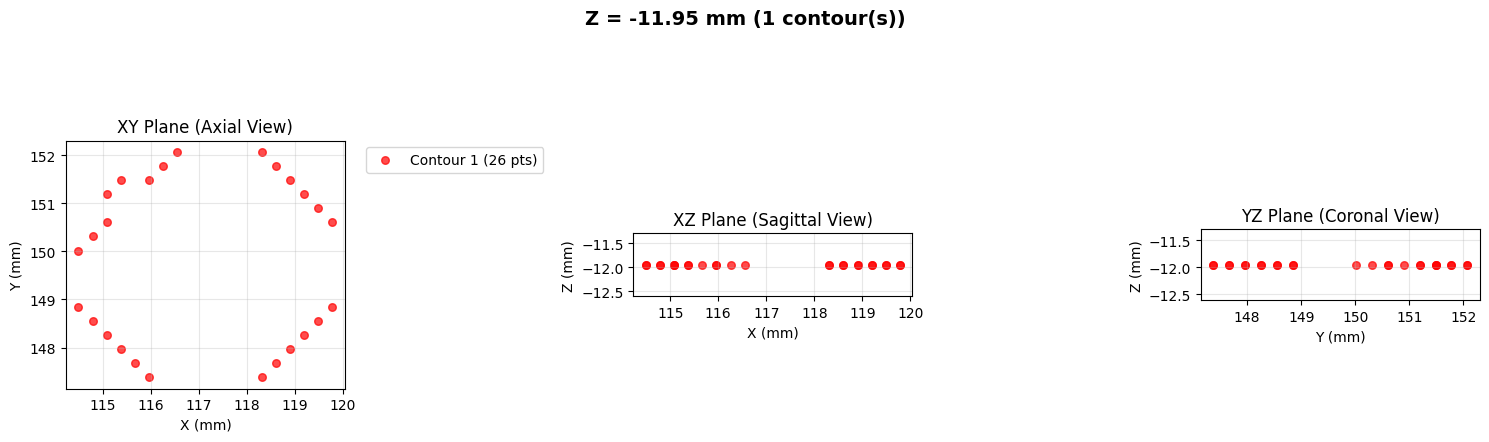

  Total points at z = -11.95 mm: 26

Overall Summary:
Total contours: 9
Unique z-values: 7
Z-value range: -29.88 to -11.95 mm
Z-value spacing: [2.988 2.987 2.988 2.987 2.988 2.987]


In [14]:
# Analyze unique z-values and plot contours grouped by z-value
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Set to True to flip the y-axis (useful for medical imaging coordinate systems)
flip_y_axis = True
# flip_y_axis = False

if 'rt_reader' in locals():
    structure_name = 'target1'
    try:
        # Get structure index
        structure_index = rt_reader.get_structure_index(structure_name)
        contour_data = rt_reader.roi_contours[structure_index]
        
        print(f"Analyzing z-values for all {len(contour_data.ContourSequence)} contours in '{structure_name}'")
        
        # Extract z-values and group contours by z-value
        z_value_groups = defaultdict(list)
        all_z_values = []
        
        for i, contour in enumerate(contour_data.ContourSequence):
            # Extract coordinates
            contour_points = np.array(contour.ContourData).reshape(-1, 3)
            z_coords = contour_points[:, 2]
            
            # Get unique z-value for this contour (should be only one)
            unique_z = np.unique(z_coords)
            if len(unique_z) == 1:
                z_value = unique_z[0]
                z_value_groups[z_value].append((i, contour_points))
                all_z_values.append(z_value)
                print(f"Contour {i+1}: z = {z_value:.2f} mm, {len(contour_points)} points")
            else:
                print(f"Warning: Contour {i+1} has multiple z-values: {unique_z}")
        
        # Get unique z-values and sort them
        unique_z_values = sorted(set(all_z_values))
        print(f"\nFound {len(unique_z_values)} unique z-values:")
        for z_val in unique_z_values:
            num_contours = len(z_value_groups[z_val])
            print(f"  z = {z_val:.2f} mm: {num_contours} contour(s)")
        
        # Define colors for different contours
        colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta']
        
        # Create plots for each unique z-value
        for z_idx, z_value in enumerate(unique_z_values):
            contours_at_z = z_value_groups[z_value]
            num_contours_at_z = len(contours_at_z)
            
            print(f"\nCreating plot for z = {z_value:.2f} mm ({num_contours_at_z} contour(s))")
            
            # Create figure with subplots
            fig, axes = plt.subplots(1, 3, figsize=(15, 5))
            fig.suptitle(f'Z = {z_value:.2f} mm ({num_contours_at_z} contour(s))', 
                        fontsize=14, fontweight='bold')
            
            # Plot each contour at this z-value
            for contour_idx, (original_idx, contour_points) in enumerate(contours_at_z):
                x_coords = contour_points[:, 0]
                y_coords = contour_points[:, 1]
                z_coords = contour_points[:, 2]
                
                color = colors[contour_idx % len(colors)]
                label = f'Contour {original_idx+1} ({len(contour_points)} pts)'
                
                # XY plane (axial view) - main view for axial contours
                axes[0].scatter(x_coords, y_coords, c=color, s=30, alpha=0.7, label=label)
                axes[0].set_xlabel('X (mm)')
                axes[0].set_ylabel('Y (mm)')
                axes[0].set_title('XY Plane (Axial View)')
                axes[0].grid(True, alpha=0.3)
                axes[0].set_aspect('equal')
                # if flip_y_axis:
                #     axes[0].set_ylim(axes[0].get_ylim()[::-1])  # Flip y-axis by reversing limits
                
                # XZ plane (sagittal view)
                axes[1].scatter(x_coords, z_coords, c=color, s=30, alpha=0.7, label=label)
                axes[1].set_xlabel('X (mm)')
                axes[1].set_ylabel('Z (mm)')
                axes[1].set_title('XZ Plane (Sagittal View)')
                axes[1].grid(True, alpha=0.3)
                axes[1].set_aspect('equal')
                
                # YZ plane (coronal view)
                axes[2].scatter(y_coords, z_coords, c=color, s=30, alpha=0.7, label=label)
                axes[2].set_xlabel('Y (mm)')
                axes[2].set_ylabel('Z (mm)')
                axes[2].set_title('YZ Plane (Coronal View)')
                axes[2].grid(True, alpha=0.3)
                axes[2].set_aspect('equal')
            
            # Add legend to the first subplot
            axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            
            plt.tight_layout()
            plt.show()
            
            # Print summary for this z-value
            total_points_at_z = sum(len(contour_points) for _, contour_points in contours_at_z)
            print(f"  Total points at z = {z_value:.2f} mm: {total_points_at_z}")
        
        # Print overall summary
        print(f"\nOverall Summary:")
        print(f"Total contours: {len(contour_data.ContourSequence)}")
        print(f"Unique z-values: {len(unique_z_values)}")
        print(f"Z-value range: {min(unique_z_values):.2f} to {max(unique_z_values):.2f} mm")
        print(f"Z-value spacing: {np.diff(unique_z_values)}")
        
    except Exception as e:
        print(f"Error analyzing z-values: {e}")
else:
    print("RT reader not initialized. Please run the previous cells first.")
